# Spam SMS Detection

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

#importing libraries for nlp
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Importing dataset

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (5572, 5)


In [3]:
#drop unnamed columns

df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [6]:
#checking for duplicate value

df.duplicated().sum()

403

In [7]:
#removing duplicates

df=df.drop_duplicates(keep='first')

In [8]:
#rename the column

df=df.rename(columns={'v1':'label','v2':'text'})
df.head(1)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."


In [9]:
df.groupby('label').describe().transpose()

label                                                      ham  \
text count                                                4516   
     unique                                               4516   
     top     Go until jurong point, crazy.. Available only ...   
     freq                                                    1   

label                                                     spam  
text count                                                 653  
     unique                                                653  
     top     Free entry in 2 a wkly comp to win FA Cup fina...  
     freq                                                    1

In [10]:
#checking for null values

df.isnull().sum()

label    0
text     0
dtype: int64

# Data Preparation

In [11]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

<AxesSubplot: ylabel='count'>

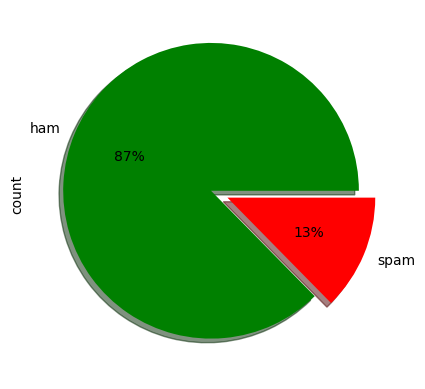

In [12]:
plot_df = df.label.value_counts()
colors = ['green','red']
explode=(0.06,0.06)
plot_df.plot(kind="pie",shadow=True,explode=explode,colors=colors,autopct='%1.0f%%')

In [13]:
#convert categorical value into numerical in label column

df.loc[df['label']=='spam','label']=1
df.loc[df['label']=='ham','label']=0

In [14]:
#For balancing the dataset

df_largeset=df[df['label']==0]
df_smallset=df[df['label']==1]

#resmapling with replacement

df_smallset_upsampled=resample(df_smallset,replace=True,n_samples=4825,random_state=0)
df=pd.concat([df_largeset,df_smallset_upsampled])
df['label'].value_counts()

label
1    4825
0    4516
Name: count, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

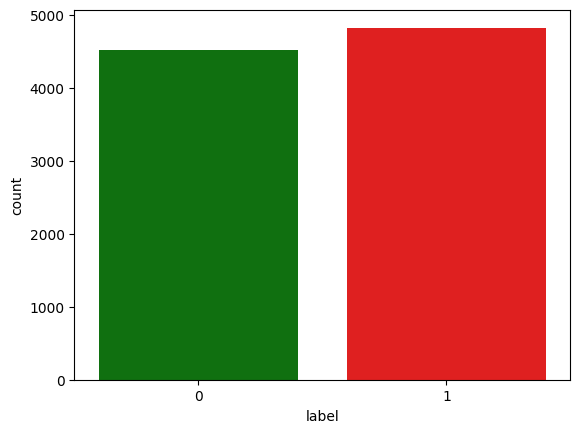

In [15]:
sns.countplot(x='label',data=df,palette=['g','r'])

In [16]:
X=df['text']
y=df['label']

#train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

# Vectorization

In [17]:
vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_vect=vect.fit_transform(X_train)
X_test_vect=vect.transform(X_test)

#label column is in object type we need to convert it into integer 

y_train=y_train.astype('int')
y_test=y_test.astype('int')

# Model Building

# 1)Naive Bayes Model

In [18]:
model=MultinomialNB()
model.fit(X_train_vect,y_train)

MultinomialNB()

In [19]:
pred=model.predict(X_test_vect)
acc=accuracy_score(y_test,pred)
print('Accuracy: ',acc.round(4)*100,'%')

Accuracy:  97.75 %


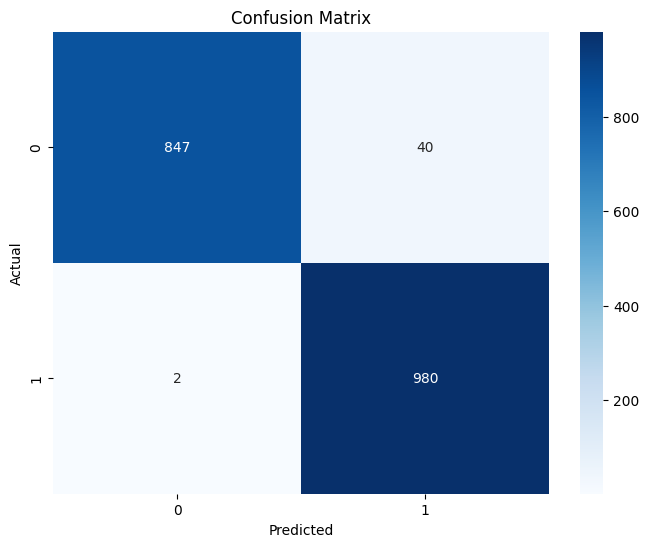

In [20]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

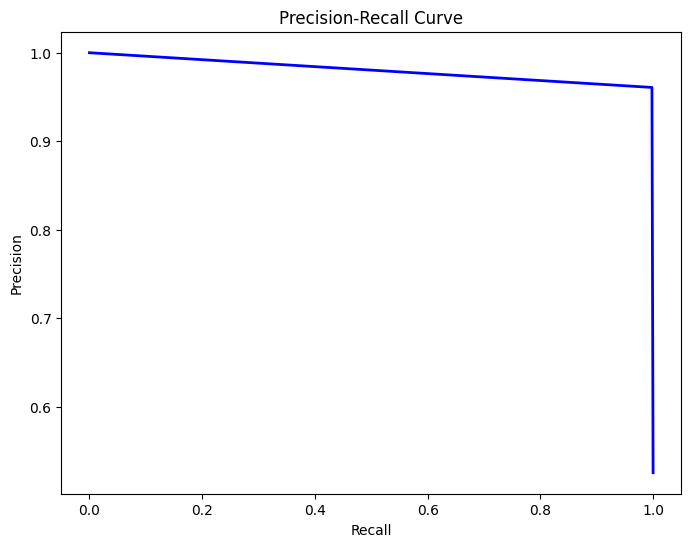

In [21]:
precision, recall, _ = precision_recall_curve(y_test, pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 2)Logistic Regression

In [22]:
model = LogisticRegression()
model.fit(X_train_vect,y_train)

LogisticRegression()

In [23]:
# Make predictions on the training data and calculate the accuracy

prediction_on_training_data = model.predict(X_train_vect)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [24]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.996654175588865


In [25]:
# Make predictions on the test data and calculate the accuracy

prediction_on_test_data = model.predict(X_test_vect)
accuracy_on_test_data = accuracy_score(y_test,prediction_on_test_data)

In [26]:
print("Accuracy on test data:",accuracy_on_test_data)

Accuracy on test data: 0.9957196361690743


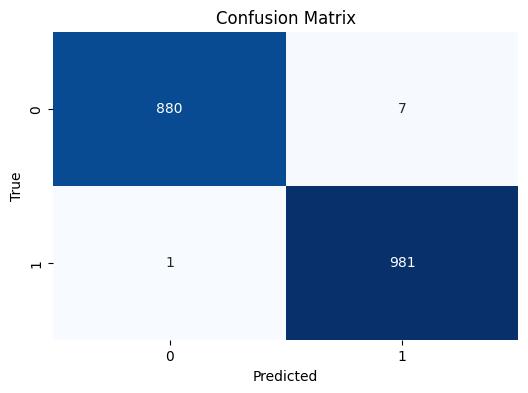

In [27]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()